In [2]:

import numpy as np
import scipy.linalg as linalg
from matplotlib import pyplot
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import math

[ 0.6  1.2  0.8  0.4]
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  1.]]
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


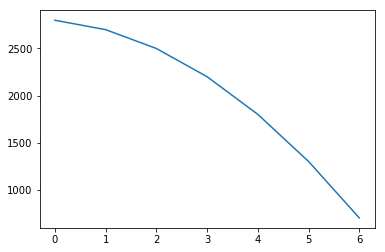

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/opt/conda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


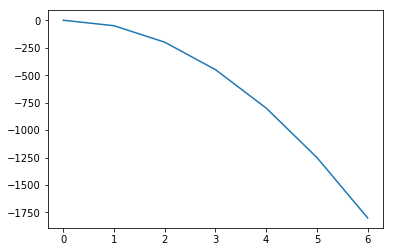

In [50]:






# 2 of 1.2
K_4  = linalg.toeplitz([2, -1, 0, 0])
x = np.linalg.solve(K_4, np.transpose(np.asarray([0,1,0,0])))
print(x)


# 4 of 1.2
D_10_bdif = np.tri(10,10)-2*np.tri(10,10,-1)+np.tri(10,10, -2)
print(D_10_bdif)
print(np.linalg.inv(D_10_bdif))
# 和分行列（積分）になった


# 13 of 1.2
h=1/10
T_7  = linalg.toeplitz([2, -1, 0, 0,0,0,0])
T_7[0,0] =1
x = np.linalg.solve(T_7, np.transpose(np.asarray([1,1,1,1,1,1,1])))
# print(x)
pyplot.plot(x/h/h)
pyplot.show()
pyplot.hold(True);
trueD = (1-(1/h/h)*(np.asarray([0,1,2,3,4,5,6]))*(np.asarray([0,1,2,3,4,5,6])))/2
pyplot.plot(trueD)
pyplot.show()



### 1.2.1
次の関数の2階微分と2階差分はなにか。

#### 解答
$(A-B)\delta(x)$

$U_n = [0,A-B, 0]$


### 1.2.2
$u(-2)=0, u(3)=0$の条件の下$-u''(x)=\delta(x)$を解け。

#### 解答
$-u'(x)=step(x)+A$

$-u(x)=x*step(x)+Ax+B$

ここで初期条件を使って、

$A=-\frac{3}{5}, B=-\frac{6}{5}$



In [7]:
K_4  = linalg.toeplitz([2, -1, 0, 0])
print(K_4)
x = np.linalg.solve(K_4, np.transpose(np.asarray([0,1,0,0])))
print(x)

print([0.6, 1.2, 0.8,  0.4])

[[ 2 -1  0  0]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [ 0  0 -1  2]]
[ 0.6  1.2  0.8  0.4]
[0.6, 1.2, 0.8, 0.4]


### 1.2.3
中心差分$(u(x+h)-u(x-h))/2h$の誤差における$h^2$の項は$\frac{1}{6]h^2u'''(x)$である。$u(x)=x^3, u(x)=x^4$についてこれを確認せよ

#### 解答
$u(x)=x^3のとき、u'''(x)=6$だから、誤差における$h^2$の項は$h^2$である。
実際に計算してみると、

In [33]:
n=11
x=np.transpose(np.array([[-3,-2,-1,0,1,2,3,4,5,6,7]]))
a=-np.ones([1,n])
b=np.zeros([1,n])
x3 = x*x*x
x4=x*x*x*x
x3d = 3*x*x
x4d = 4*x*x*x
print(x3)
A = 1/2*sp.spdiags(np.r_[a, b, -a], [-1,0,1],n,n).toarray()
print(A.dot(x3)-x3d)
print(A.dot(x4)-x4d)

[[-27]
 [ -8]
 [ -1]
 [  0]
 [  1]
 [  8]
 [ 27]
 [ 64]
 [125]
 [216]
 [343]]
[[ -31.]
 [   1.]
 [   1.]
 [   1.]
 [   1.]
 [   1.]
 [   1.]
 [   1.]
 [   1.]
 [   1.]
 [-255.]]
[[  116.]
 [   -8.]
 [   -4.]
 [    0.]
 [    4.]
 [    8.]
 [   12.]
 [   16.]
 [   20.]
 [   24.]
 [-2020.]]
[[-108]
 [ -32]
 [  -4]
 [   0]
 [   4]
 [  32]
 [ 108]
 [ 256]
 [ 500]
 [ 864]
 [1372]]


### 1.2.4
式(28)の後退差分行列の逆行列が式(29)の和分行列であることを確認せよ。

#### 解答
和分行列であることが確認できた。
一方で、中心差分行列は3次の場合は逆行列が存在したが、5次の場合detが0となり逆行列が存在しなかった。
微分方程式としてはどういう意味？

In [49]:
a=np.ones([1,4])
T_3_b= sp.spdiags(np.r_[-a, a], [-1,0],3,3).toarray()
T_3_f= sp.spdiags(np.r_[-a, a], [1,0],3,3).toarray()
T_4_b= sp.spdiags(np.r_[-a, a], [-1,0],4,4).toarray()
T_4_f= sp.spdiags(np.r_[-a, a], [1,0],4,4).toarray()
T_5_b= sp.spdiags(np.r_[-a, a], [-1,0],5,5).toarray()
T_5_f= sp.spdiags(np.r_[-a, a], [1,0],5,5).toarray()
D_3_cent = (T_3_f + T_3_b)/2
D_5_cent = (T_5_f + T_5_b)/2
print(T_4_b)
print(linalg.inv(T_4_b))
print(T_4_f)
print(D_3_cent)
print(linalg.solve(D_3_cent, np.zeros([3,1])))
print(linalg.solve(D_5_cent, np.zeros([5,1])))


[[ 1.  0.  0.  0.]
 [-1.  1.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  0. -1.  1.]]
[[ 1. -0. -0. -0.]
 [ 1.  1. -0. -0.]
 [ 1.  1.  1. -0.]
 [ 1.  1.  1.  1.]]
[[ 1. -1.  0.  0.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  1. -1.]
 [ 0.  0.  0.  1.]]
[[ 1.  -0.5  0. ]
 [-0.5  1.  -0.5]
 [ 0.  -0.5  1. ]]
[[ 0.]
 [ 0.]
 [ 0.]]


LinAlgError: Matrix is singular.

### 1.2.5
前進差分のテイラー展開において、$u(x)=x^4, x=0$とすることにより、4次の項の係数を求めよ。

#### 解答
$u(x+h) = u(x)+hu'(x)+\frac{1}{2}h^2u''(x)+\frac{1}{6}h^3u'''(x)+...$
4次の項は$\frac{1}{24}h^4u''''(x)$
いま、$u(x)=x^4$だから$u''''(x)=24$で、よって求める係数はa


### 1.2.6
$u(x)=x^4$について、２階微分と2階差分を求めよ。比較を行い、誤差の主要項の係数を求めよ。

#### 解答
微分については$12x^2$。テイラー展開の結果、二階差分で$x^4$を演算する場合誤差の項は2次の項と4次の項があるが、主要項を2次の項とすれば$2*12*\Delta x$であるから、係数は24である。


### 1.2.7
$u$において4点の標本値を使えば、$\frac{du}{dx}$に対する4次精度の中心差分が計算できる。

$\frac{-u_2+8u_1-8u_{-1}+u_{-2}}{12h}$
1. この式が$u=1, u=x^2, u=x^4$について正しいことを確認せよ。


#### 解答
1. u=1については各項の係数から明らかである。他の係数のものも、5項分使わないと理論的に正しくないので端部ではエラーが大きいが中心付近では計算機の計算精度依存のみになっているように見られた。



In [ ]:
n=15
a=np.ones([1,n])
D_10_4pre= 1/12*sp.spdiags(np.r_[a, -8*a, 8*a, -a], [-2,-1,1,2],n,n).toarray()
print(D_10_4pre*12)
x=np.array(range(n))
x_2 = x*x
x_4 =x*x*x*x
x_2_d = 2*x
x_4_d = 4*x*x*x
print(D_10_4pre.dot(x_4)-x_4_d)
print(D_10_4pre.dot(x_2)-x_2_d)




### 1.2.8
$u_{-2},u_{-1},u_{0},u_{1},u_{2}$を組み合わせて4次精度の中心差分？

#### 解答
$\frac{-u_2+16u_1+30u_0+16u_{-1}-u_{-2}}{12h}$


### 1.2.9

$\frac{-u_2-4u_1+6u_0-4u_{-1}+u_{-2}}{12h}$

#### 解答

以下の結果より4次の係数は-22

In [51]:
n=15
a=np.ones([1,n])
D_n_4d_4pre= 1/12*sp.spdiags(np.r_[a, -4*a, 6*a,  -4*a, a], [-2,-1, 0,1,2],n,n).toarray()
print(D_n_4d_4pre*12)
x=np.transpose(np.array([range(n)]))
print(x)
x_2 = x*x
x_3=x*x*x
x_4 =x*x*x*x
x_4_d4 = 24
print(D_n_4d_4pre.dot(x))
print(D_n_4d_4pre.dot(x_2))
print(D_n_4d_4pre.dot(x_3))
print(D_n_4d_4pre.dot(x_4)-x_4_d4)

[[ 6. -4.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-4.  6. -4.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  6. -4.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  6. -4.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  6. -4.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -4.  6. -4.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -4.  6. -4.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -4.  6. -4.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -4.  6. -4.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -4.  6. -4.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -4.  6. -4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -4.  6. -4.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -4.  6. -4.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -4.  6. -4.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -4.  6.]]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]


### 1.2.10
前進差分と後退差分の行列をかける順番を変えた時、

#### 解答
末尾の行が境界条件となる。u'=0は最初の行。

In [52]:
T_5_b= sp.spdiags(np.r_[-a, a], [-1,0],5,5).toarray()
T_5_f= sp.spdiags(np.r_[-a, a], [1,0],5,5).toarray()
D_5_cent = (T_5_f.dot(T_5_b))/2
print( (T_5_f.dot(T_5_b))/2)
print( (T_5_b.dot(T_5_f))/2)

[[ 1.  -0.5  0.   0.   0. ]
 [-0.5  1.  -0.5  0.   0. ]
 [ 0.  -0.5  1.  -0.5  0. ]
 [ 0.   0.  -0.5  1.  -0.5]
 [ 0.   0.   0.  -0.5  0.5]]
[[ 0.5 -0.5  0.   0.   0. ]
 [-0.5  1.  -0.5  0.   0. ]
 [ 0.  -0.5  1.  -0.5  0. ]
 [ 0.   0.  -0.5  1.  -0.5]
 [ 0.   0.   0.  -0.5  1. ]]


### 1.2.11

#### 解答
1.5, -2, 0.5


In [ ]:
A=np.array([[1,1,1],[0,-1,-2],[0,1,4]])
print(A)
f=np.transpose(np.array([[0,1,0]]))
print(f)
print(linalg.solve(A,f))

### 1.2.12


#### 解答
テイラー展開するとそうなる


### 1.2.13


#### 解答



[1 1 1 1 1 1 1]
[21 21 20 18 15 11  6]


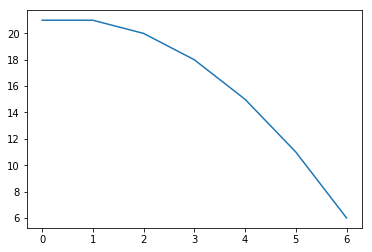

In [48]:
n=7
h=0.1
A = np.array([1,1,1,1,1,1,1])
print(A)
for x in range(n):
    A[x] =np.sum(range(n))-np.sum(range(x))
a = h*h*(np.array([range(n)]))
print(A)
pyplot.plot(A)
pyplot.show()

### 1.2.14


#### 解答
完全解は$x^4-1$


In [105]:
print(np.hstack((np.array([1,-1]),np.zeros(8))))
U_n = linalg.toeplitz(np.hstack((np.array([1,-1]),np.zeros(8))))*np.transpose(np.tri(10))
print(U_n)

[ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
[[ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-0.  1. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -0.  1. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -0.  1. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -0.  1. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -0.  1. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -0.  1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -0.  1.]]


### 1.2.15


#### 解答



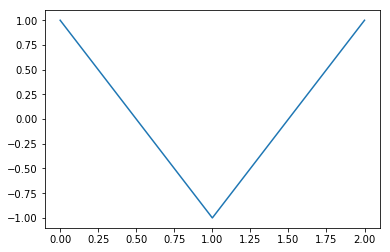

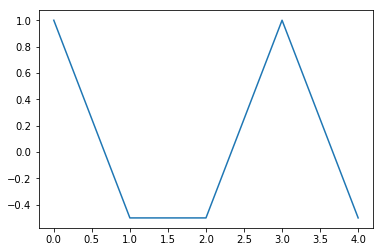

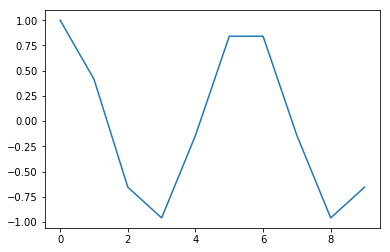

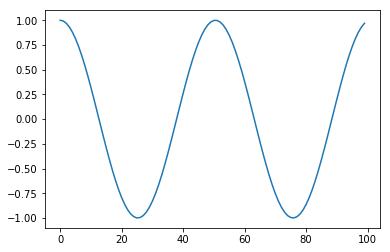

In [117]:
for n in [3,5,10,100]:
    h=np.array(np.array(range(n)))/(n+1)
    u=np.cos(4*math.pi*h)
    pyplot.plot(u)
    pyplot.show()


### 1.2.16


#### 解答



[ 0.          0.03225806  0.06451613  0.09677419  0.12903226  0.16129032
  0.19354839  0.22580645  0.25806452  0.29032258  0.32258065  0.35483871
  0.38709677  0.41935484  0.4516129   0.48387097  0.51612903  0.5483871
  0.58064516  0.61290323  0.64516129  0.67741935  0.70967742  0.74193548
  0.77419355  0.80645161  0.83870968  0.87096774  0.90322581  0.93548387]


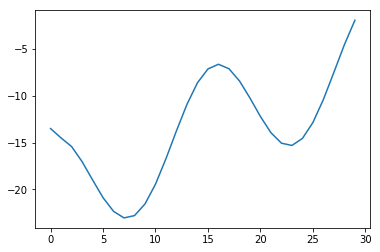

In [150]:
m=1
nn=30
n=nn*m    
h=np.array(np.array(range(n)))/(nn+1)
K_n  = linalg.toeplitz(np.hstack((np.array([2,-1]),np.zeros(n-2))))
K_n[0,0] = 1
K_n[1,0:3] = np.array([0,1,-1])
# print(K_n)
f=np.cos(4*math.pi*h)
print(h)

pyplot.plot(linalg.solve(K_n, f))
pyplot.show()




### 1.2.17


#### 解答
手計算


### 1.2.18


#### 解答



### 1.2.19


#### 解答



### 1.2.20


#### 解答



### 1.2.21


#### 解答



### 1.2.22


#### 解答

